# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 8</font>

## Download: http://github.com/dsacademybr

# Scikit-learn

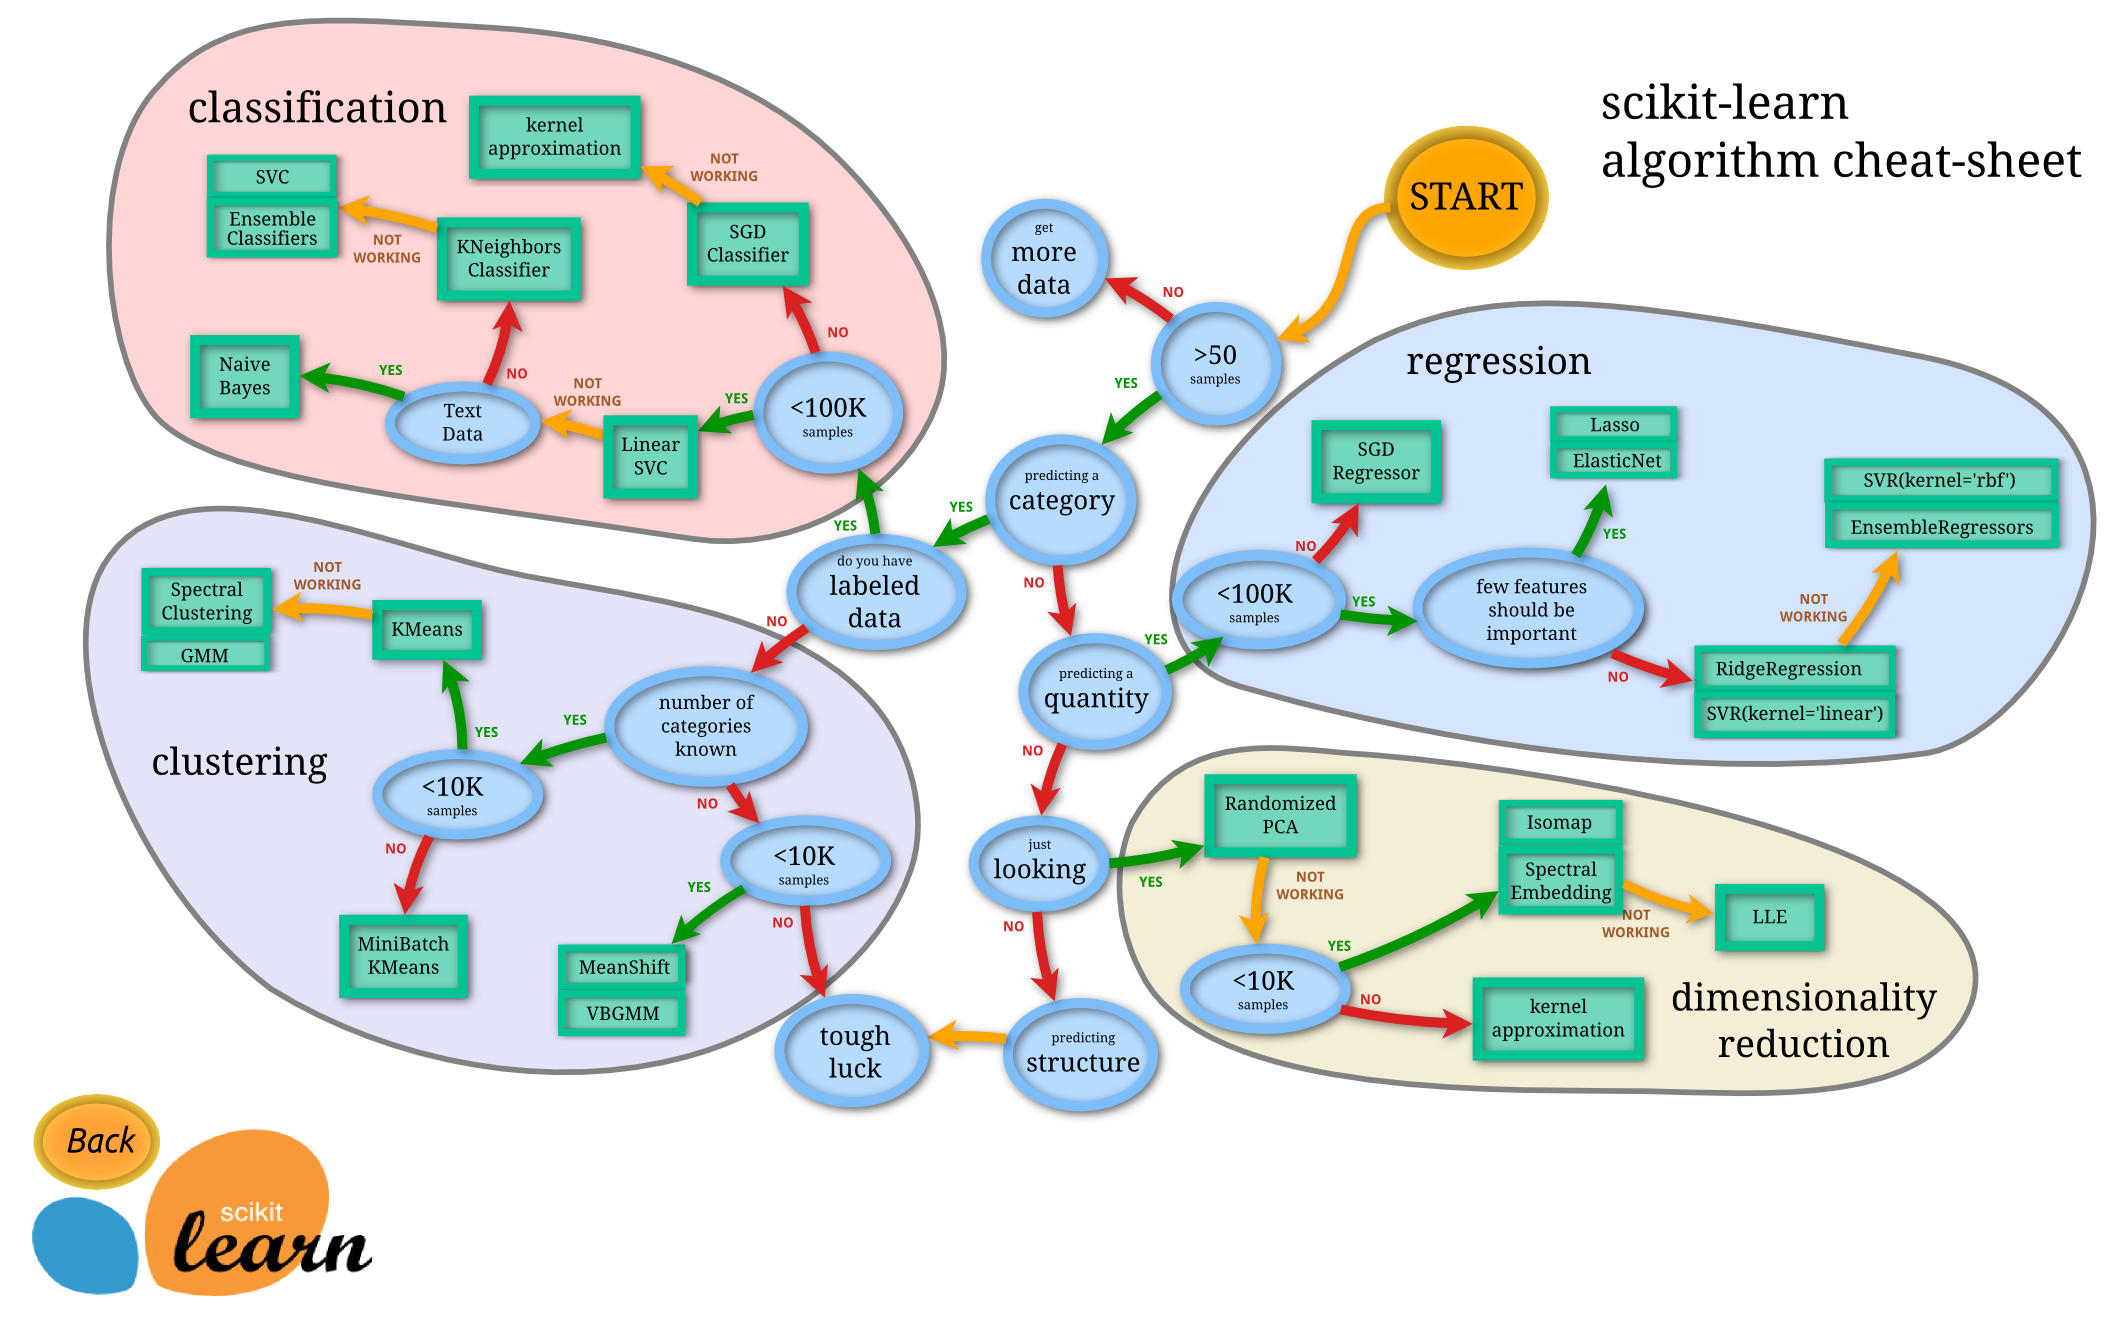

In [1]:
from IPython.display import Image
Image('ml_map.png')

### Prevendo o Preço da Pizza

### Suponha que você queira prever o preço da pizza. Para isso, vamos criar um modelo de regressão linear para prever o preço da pizza, baseado em um atributo da pizza que podemos observar. Vamos modelar a relação entre o tamanho (diâmetro) de uma pizza e seu preço. Escreveremos então um programa com sckit-learn, que prevê o preço da pizza dado seu tamanho. 


### <font color='blue'>O conjunto de técnicas de regressão é muito provavelmente um dos mais simples modelos utilizadoa em análises de dados que procuram entender a relação entre o comportamento de determinado fenômeno e o comportamento de uma ou mais variáveis potencialmente preditoras, sem que haja, entretanto uma obrigatória relação de causa e efeito.</font>

### <font color='red'>É de fundamental importância que o pesquisador seja bastante cuidadoso e criterioso ao interpretar os resultados de uma modelagem de regressão. A existência de um modelo de regressão não significa que ocorra, obrigatoriamente, relação de causa e efeito entre as variáveis consideradas.</font>

In [2]:
# Importando Matplotlib e Numpy
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

### Vamos supor que você registrou o tamanho e preço de pizzas que você comeu nos últimos meses com a sua família.

<table class="ArticleTableNoBorder">
	<tbody>
		<tr>
			<td><strong>Instância</strong></td>
			<td><strong>Diâmetro(cm)</strong></td>
            <td><strong>Preço(R$)</strong></td>
		</tr>
		<tr>
			<td><code>1</code></td>
			<td>7</td>
            <td>8</td>
		</tr>
		<tr>
			<td><code>2</code></td>
			<td>10</td>
            <td>11</td>
		</tr>
		<tr>
			<td><code>3</code></td>
			<td>15</td>
            <td>16</td>
		</tr>
		<tr>
			<td><code>4</code></td>
			<td>30</td>
            <td>38.5</td>
		</tr>
		<tr>
			<td><code>5</code></td>
			<td>45</td>
            <td>52</td>
		</tr>
	</tbody>
</table>

In [3]:
# Diâmetros (cm)
Diametros = [[7], [10], [15], [30], [45]]

# Preços (R$)
Precos = [[8], [11], [16], [38.5], [52]]

### Vamos visualizar estes dados construindo um plot

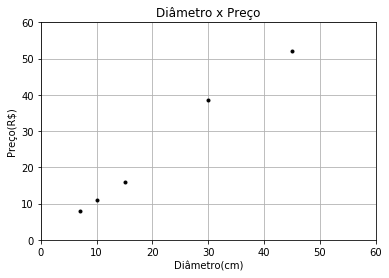

In [4]:
plt.figure()
plt.xlabel('Diâmetro(cm)')
plt.ylabel('Preço(R$)')
plt.title('Diâmetro x Preço')
plt.plot(Diametros, Precos, 'k.')
plt.axis([0, 60, 0, 60])
plt.grid(True)
plt.show()

### Pelo gráfico podemos ver que existe uma relação positiva entre diâmetro da pizza e seu preço (o que é confirmado pela experiência de comer a pizza com sua família). À medida que o diâmetro da pizza aumenta, geralmente aumenta também o preço da pizza.


### Vamos agora modelar o relacionamento usando regressão linear e criar um modelo para prever o preço da Pizza.


### A classe sklearn.linear_model.LinearRegression é um estimador. Um estimador prevê um valor baseado em dados observados. Em scikit-learn, todos os estimadores implementam os métodos fit() e predict(). O método fit() é usado para aprender os parâmetros de um modelo e o método predict() é usado para prever o valor de uma variável dependente em relação a uma variável explanatória usando os parâmetros aprendidos.


In [5]:
# Importando o módulo de Regressão Linear do scikit-learn
from sklearn.linear_model import LinearRegression

In [6]:
# Preparando os dados de treino

# Vamos chamar de X os dados de diâmetro da Pizza.
X = [[7], [10], [15], [30], [45]]

# Vamos chamar de Y os dados de preço da Pizza.
Y = [[8], [11], [16], [38.5], [52]]

In [7]:
# Criando o modelo
modelo = LinearRegression()

In [8]:
type(modelo)

sklearn.linear_model.base.LinearRegression

In [9]:
# Treinando o modelo
modelo.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
modelo.coef_

array([[1.20422117]])

In [20]:
help(modelo.predict)

Help on method predict in module sklearn.linear_model.base:

predict(X) method of sklearn.linear_model.base.LinearRegression instance
    Predict using the linear model
    
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.



In [33]:
modelo.predict([[20]])

array([[23.41409037]])

In [34]:
# Prevendo o preço de uma pizza de 20 cm de diâmetro
print("Uma pizza de 20 cm de diâmetro deve custar: R$%.2f" % modelo.predict([[20]])[0])

Uma pizza de 20 cm de diâmetro deve custar: R$23.41


### O método fit() do módulo LinearRegression aprende os parâmetros do seguinte modelo de regressão linear simples:


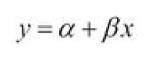

In [35]:
from IPython.display import Image
Image('linear.png')

### Y – é o valor previsto da variável dependente (em nosso exemplo o preço da Pizza)
### X – é a variável explanatória (em nosso exemplo o diâmetro da Pizza)
### Alfa é o termo de intercepção ou coeficiente linear
### Beta é o coeficiente de cada variável ou coeficiente angular


## Alfa e Beta são parâmetros do modelo que são aprendidos pelo algoritmo de aprendizagem.


# Construindo um Scatter Plot

In [36]:
# Coeficientes
print('Coeficiente: \n', modelo.coef_)

# MSE (mean square error)
print("MSE: %.2f" % np.mean((modelo.predict(X) - Y) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % modelo.score(X, Y))

Coeficiente: 
 [[1.20422117]]
MSE: 2.74
Score de variação: 0.99


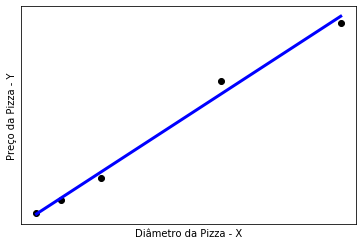

In [38]:
# Scatter Plot representando a regressão linear
plt.scatter(X, Y,  color = 'black')
plt.plot(X, modelo.predict(X), color = 'blue', linewidth = 3)
plt.xlabel('Diâmetro da Pizza - X')
plt.ylabel('Preço da Pizza - Y')
plt.xticks(())
plt.yticks(())

plt.show()

# Explorando o Dataset Boston Housing

#### Dataset: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [39]:
# Importando os módulos necessários
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
#%matplotlib inline

In [40]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
from sklearn.datasets import load_boston
boston = load_boston()

In [44]:
print(dir(sklearn.datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_svmlight_format', 'base', 'california_housing', 'clear_data_home', 'covtype', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_mldata', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'kddcup99', 'lfw', 'load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make_friedman3', 'make_gaussian_quantiles', 'make_hastie_10_2', 'make_low_rank_matrix', 'make_moons', 'make_multilabel_classificat

In [41]:
# Verificando o tipo da variável boston
type(boston)

sklearn.utils.Bunch

In [42]:
# Visualizando o shape do dataset, neste caso 506 instâncias (linhas) e 13 atributos (colunas)
boston.data.shape

(506, 13)

In [43]:
# Descrição do Dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [45]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [46]:
# Convertendo o dataset em um DataFrame pandas
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
# Convertendo o título das colunas
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
# boston.target é uma array com o preço das casas 
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [49]:
# Adicionando o preço da casa ao DataFrame
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
df.shape

(506, 14)

# Prevendo o Preço das Casas em Boston

### Y - variável dependente (preço das casas em Boston)
### X - variáveis independentes ou explanatórias (todas as outras caracterísricas da casa)

In [51]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

In [75]:
df.corr().style.format("{:.2}").background_gradient(cmap = plt.get_cmap('coolwarm'),axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.0,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1.0,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.0,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1.0,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1.0,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1.0,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1.0,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1.0,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1.0,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1.0,0.46,-0.44,0.54,-0.47


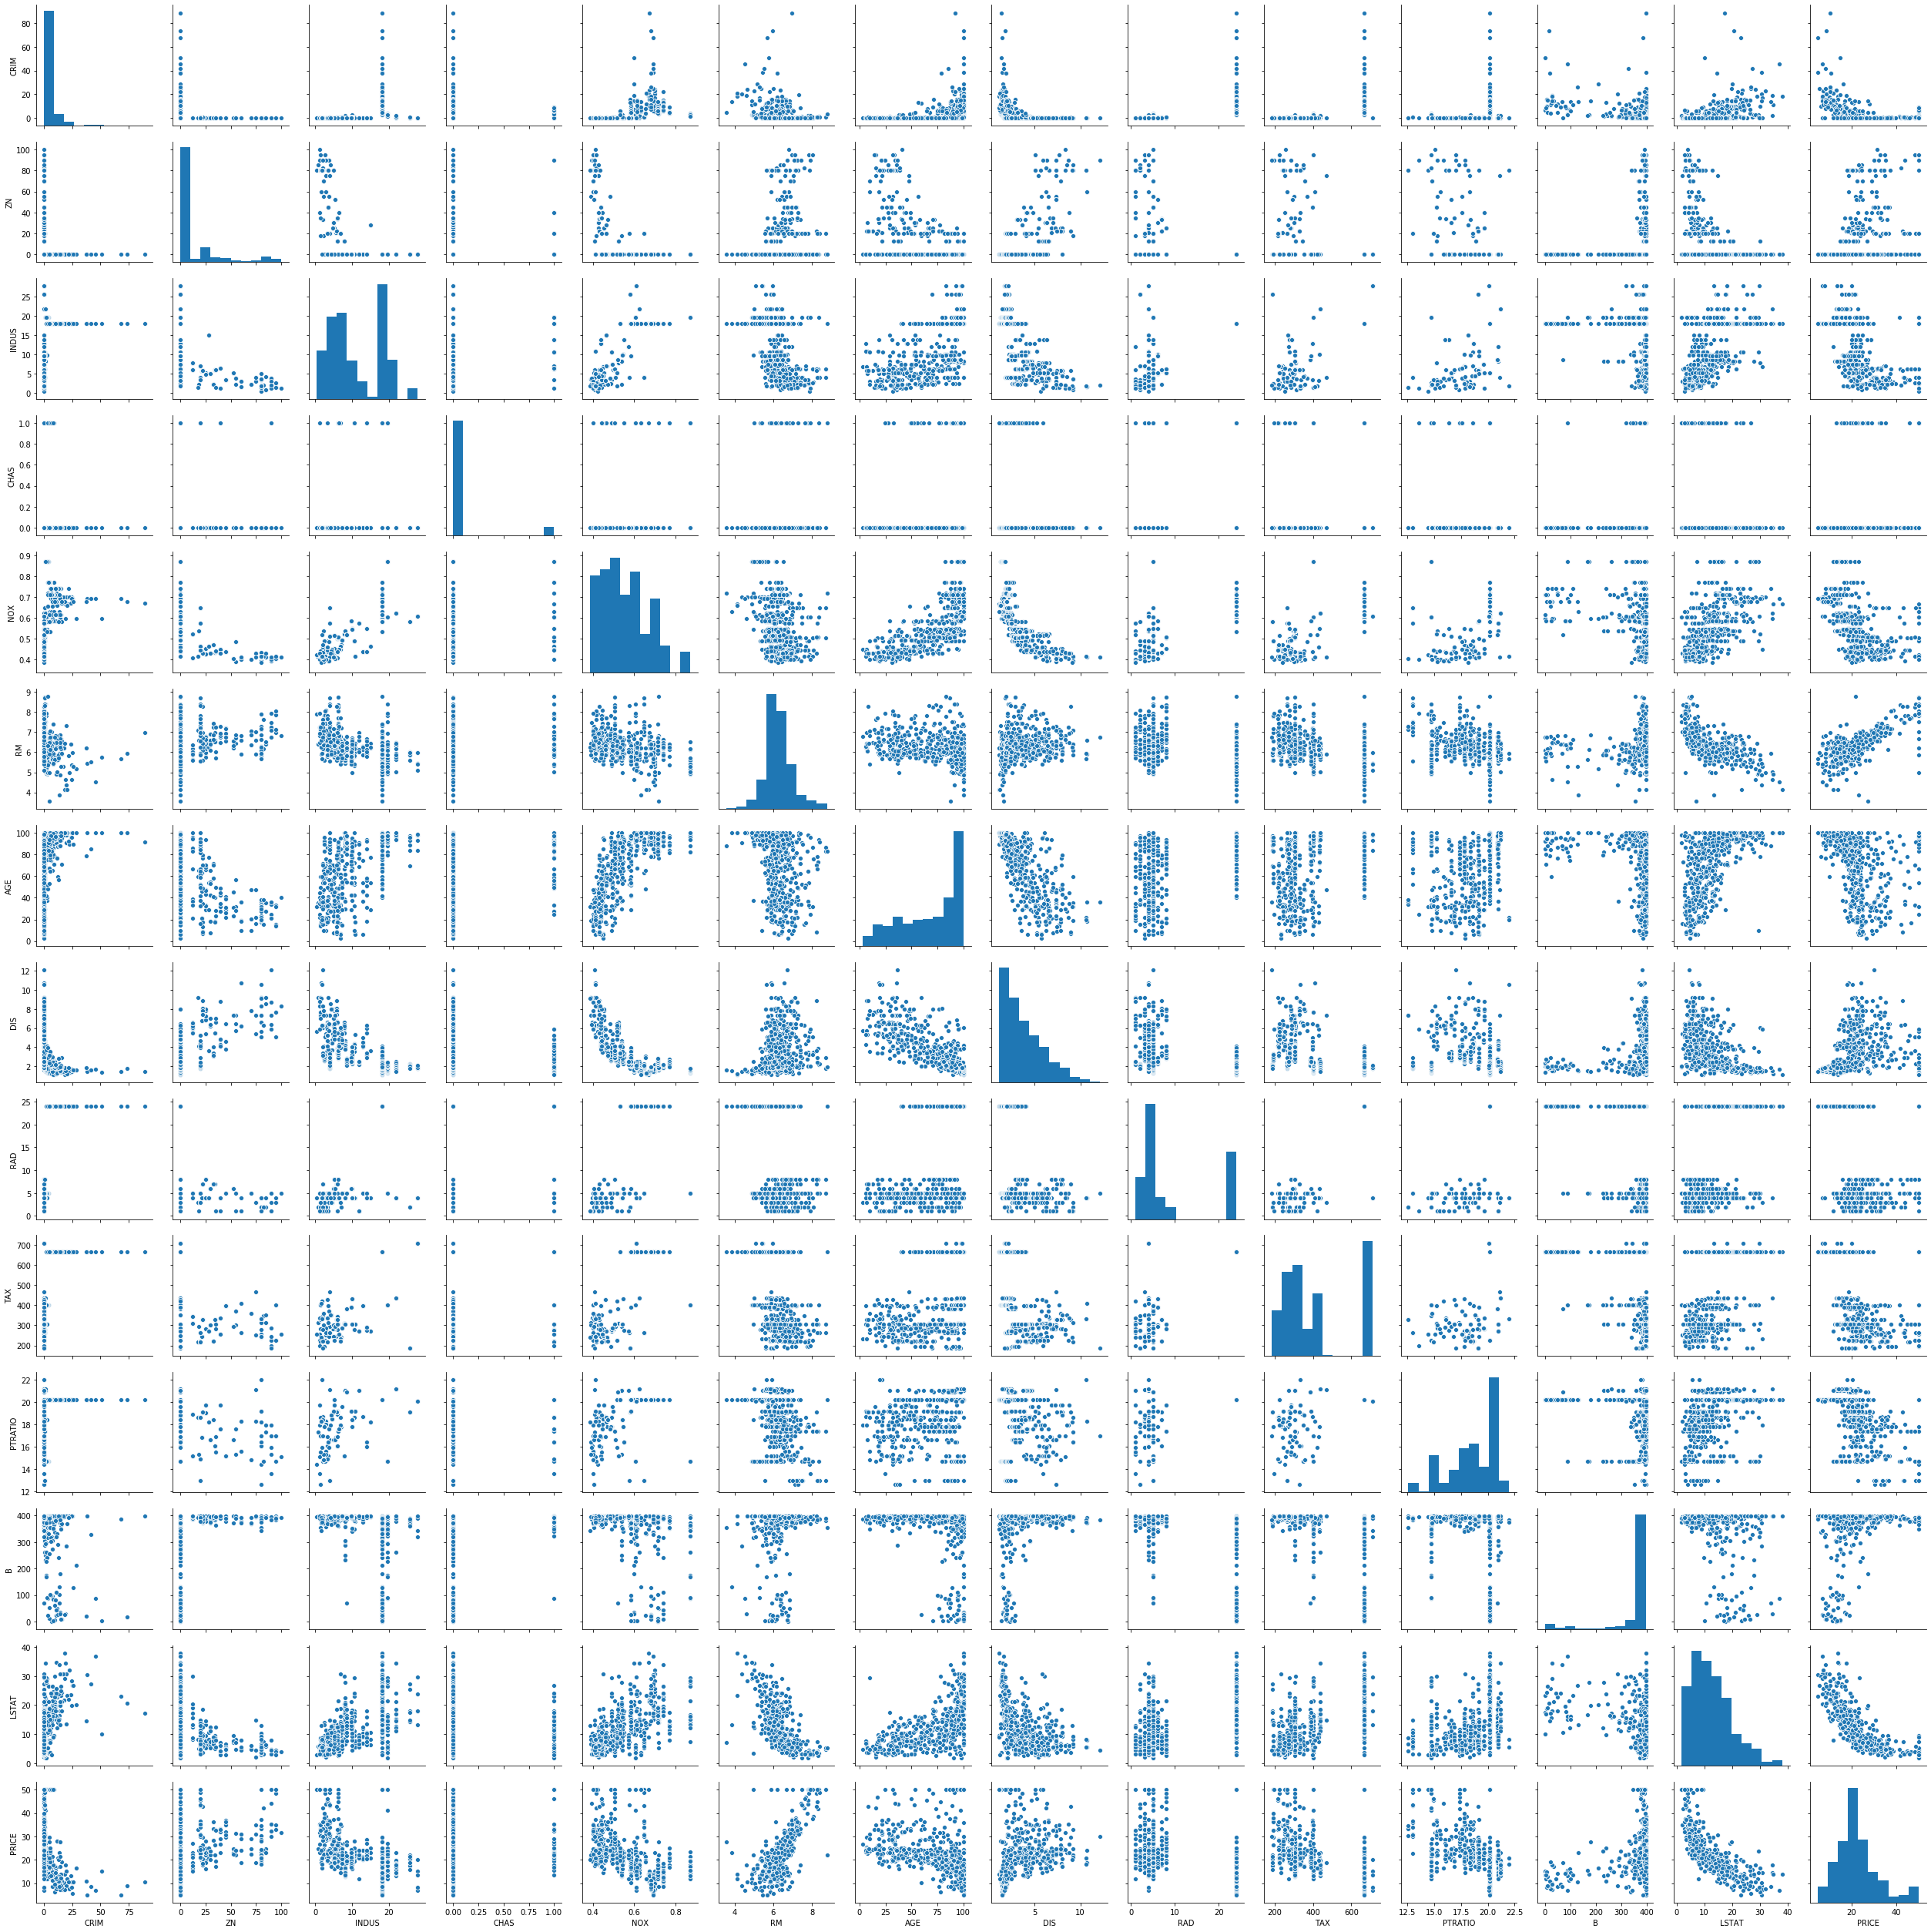

In [80]:
# library & dataset
import seaborn as sns
#df = sns.load_dataset('iris')
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(df)
plt.show()

In [52]:
# Não queremos o preço da casa como variável dependente
# pega todo dataframe menos a coluna de Price
X = df.drop('PRICE', axis = 1)

In [53]:
# Definindo Y
Y = df.PRICE

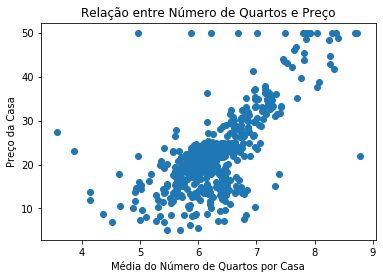

In [81]:
plt.scatter(df.RM, Y)
plt.xlabel("Média do Número de Quartos por Casa")
plt.ylabel("Preço da Casa")
plt.title("Relação entre Número de Quartos e Preço")
plt.show()

In [55]:
# Criando o objeto de regressão linear
regr = LinearRegression()

In [56]:
# Tipo do objeto
type(regr)

sklearn.linear_model.base.LinearRegression

In [57]:
# Treinando o modelo
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Coeficientes
print("Coeficiente: ", regr.intercept_)
print("Número de Coeficientes: ", len(regr.coef_))

Coeficiente:  36.45948838509015
Número de Coeficientes:  13


In [62]:
# Prevendo o preço da casa
regr.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

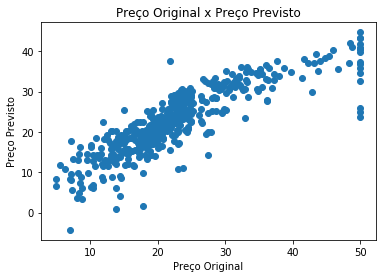

In [60]:
# Comparando preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

### Podemos ver que existem alguns erros na predição do preço das casas

In [63]:
# Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

21.89483118172922


In [64]:
# Aplicando regressão linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['PTRATIO']])) ** 2)
print(mse2)

62.65220001376927


### O MSE aumentou, indicando que uma única característica não é um bom predictor para o preço das casas.

### Na prática, você não vai implementar regressão linear em todo o dataset. Você vai dividir o dataset em datasets de treino e de teste. Assim, você treina seu modelo nos dados de treino e depois verifica como o modelo se comporta nos seus dados de teste. Vejamos:

In [65]:
# Dividindo X em dados de treino e de teste
X_treino = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste
Y_treino = df.PRICE[:-50]
Y_teste = df.PRICE[-50:]

# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(456, 13) (50, 13) (456,) (50,)


### Podemos criar nossos datasets de treino de forma manual, mas claro este não é método correto. Vamos então dividir os datasets randomicamente. O Scikit-Learn provê uma função chamada train_test_split() para isso.

In [66]:
from sklearn.model_selection import train_test_split

In [86]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.3, random_state = 5)

In [87]:
# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(354, 13) (152, 13) (354,) (152,)


In [88]:
# Construindo um modelo de regressão
regr = LinearRegression()

In [89]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

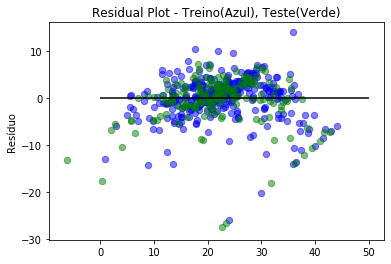

In [72]:
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>